In [14]:
##########################################################################################
# FILE: HW2_S1_JaehyukChoi.py
# AUTHOR: Jaehyuk Choi (1215326372)
# CONTACT INFO: jchoi154@asu.edu
#
# COURSE INFO
# CSE575 Fall 2019
# Homework2 10-27-2019
#
# DESCRIPTION
# The program classifies unlabeled data by using the K-Means algorithmas with 
# randomly initializing centroids. The Sum of Squared Error (SSE) within a 
# cluster was calculated for the Elbow method. Once the objective function
# was plotted, the best K was determined by the Elbow method. The case that 
# empty cluster was take care of by adding more if conditions. 
# The following algorithm is shown:
# Let X = {x1, x2, x3, … , xn}
# for K goes from 2 to 10
#     K numbers of centroids are initialized.
#         while (centroid is not stabilized || clusters_set is empty)
#             for i goes through all the points
#                 calculate all the distances between all the points and centroid such that d(x, y).
#                 clusters_set = the nearest points
#                 centroid_old = centroid 
#                 centroid = the mean of all the points assigned to the clusters_set.
# 
##########################################################################################

import pandas as pd
import numpy as np
import random as rd
import math
import scipy.io as scio
from scipy.io import loadmat
from copy import deepcopy
import matplotlib.pyplot as plt                # so we can plot the data
%matplotlib inline
# Constants for data, maximum iteration, and learning rate.

# Loads the data from AllSamples
mat_file = scio.loadmat("AllSamples.mat")

# print(type(mat_file)) # Says the class is dictionary. 
data = mat_file['AllSamples']
feature1 = data[:,0]
feature2 = data[:,1]

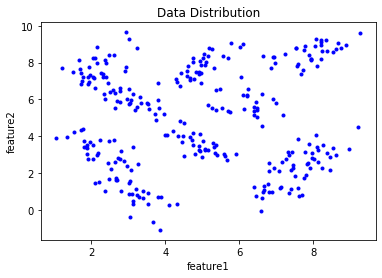

In [15]:
# plots raw data distribution
plt.plot(feature1, feature2, 'bo', markersize=3)
plt.title('Data Distribution')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

In [16]:
# checks the shape of the data 
dataset = pd.DataFrame({'Column1': feature1[:], 'Column2': feature2[:]})
print(dataset.shape)

(300, 2)


In [17]:
# colors for 10 clusters. 
colors = ['olive', 'green', 'orange', 'cyan', 'wheat', 'blue', 'purple', 'maroon', 'lavender', 'yellowgreen']


In [18]:
# iteration
def iteration(data, C, k, clusters, C_old):
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    #print(error)
    # Loop will run till the error becomes zero
    points = []
    while error > 0.0001 and np.argwhere(np.isnan(clusters))[:,0].size == 0 : 
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = dist(data[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    
    return C, clusters, points

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# SSE Caculator
def cal_sse(data_set, cent):
    sum = 0
    sse_value = []
    for value in data_set:
        sse_value.append(((np.linalg.norm((value-cent))**2)))
    return np.sum(sse_value)

# randomly initializes centroids
def random_initializing_centroid(k, C):
    for i in range(k-1):
        j=rd.randint(0,data.shape[0]-1)                   # randomly select one sample from the data [0,300)
        Centroid_temp=np.array([data[j]])               # assign the chosen sample to the initial centroid.
        C = np.vstack((C, Centroid_temp))
    return C

[[6.11106851 6.23497555]
 [4.91688902 7.51334885]]


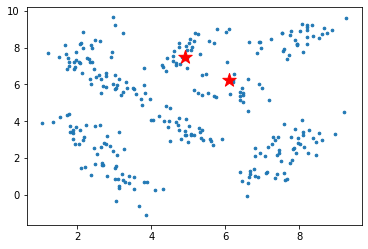

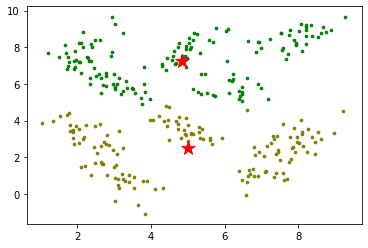

[1921.033485856206]
[[2.36057145 6.00796623]
 [6.6161895  0.66750633]
 [5.14255397 8.37451307]]


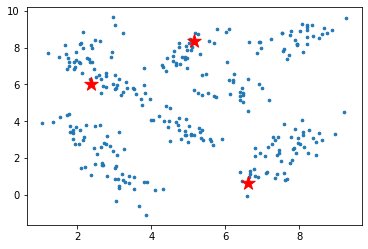

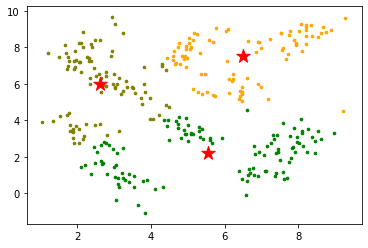

[1921.033485856206, 1294.2984174853177]
[[1.89404312 3.36258443]
 [7.52963009 8.79617112]
 [7.25412082 2.77862318]
 [5.01728788 3.76311975]]


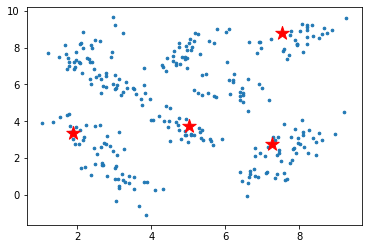

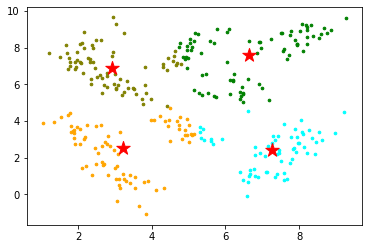

[1921.033485856206, 1294.2984174853177, 789.237972217795]
[[5.04470093 8.49060119]
 [2.37650624 8.15241778]
 [4.7585105  8.24317459]
 [6.85653225 7.72468825]
 [3.02105687 9.26213796]]


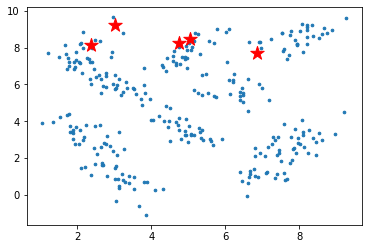

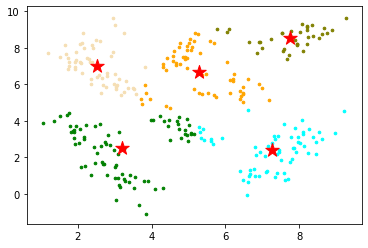

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663]
[[5.77144223 9.04075394]
 [8.67805277 9.08757916]
 [3.32202131 6.15602339]
 [4.72935154 3.80839045]
 [7.45225989 2.26860809]
 [2.16482565 7.993515  ]]


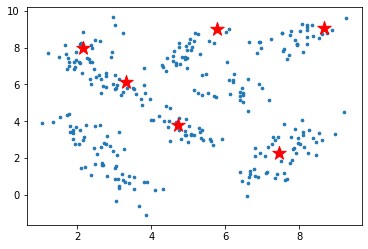

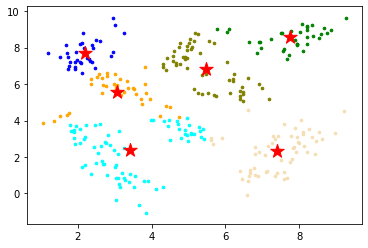

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663, 538.3680591713139]
[[2.06136024 3.54047797]
 [2.38952606 7.22195564]
 [6.39056222 5.17956451]
 [2.95147442 7.76615605]
 [8.33664582 9.23795257]
 [6.90743481 6.00718092]
 [5.33498937 3.07430754]]


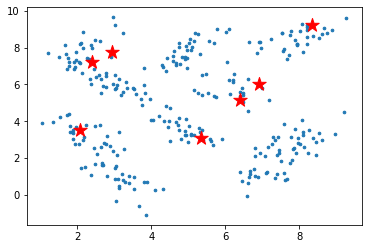

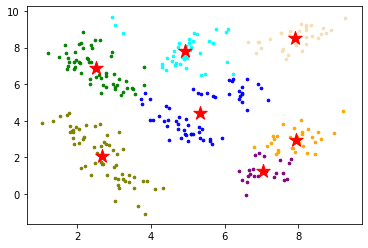

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663, 538.3680591713139, 419.3408157431245]
[[2.78903847 6.44350728]
 [6.11106851 6.23497555]
 [1.77775261 7.21854537]
 [1.52668895 4.24557918]
 [8.06160243 4.04423262]
 [1.76496239 6.98004057]
 [8.00706441 2.77531997]
 [3.89523379 0.70718356]]


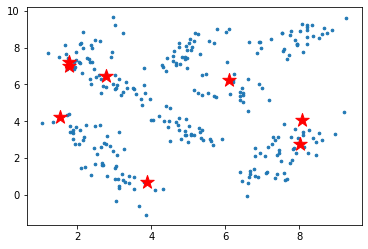

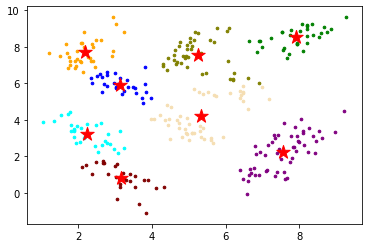

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663, 538.3680591713139, 419.3408157431245, 305.4540985153899]
[[ 6.39056222  5.17956451]
 [ 2.80096609  1.03176348]
 [ 6.5807212  -0.0766824 ]
 [ 3.2881521   0.71796855]
 [ 6.63352332  0.98020705]
 [ 2.07898569  7.16739313]
 [ 6.03237178  8.86195452]
 [ 4.7585105   8.24317459]
 [ 5.25103144  8.74212485]]


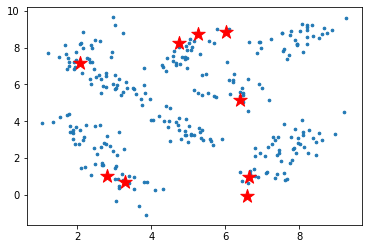

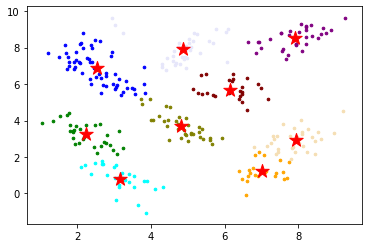

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663, 538.3680591713139, 419.3408157431245, 305.4540985153899, 240.38031402770537]
[[2.91008221 7.51943984]
 [8.37895231 8.62509614]
 [8.67805277 9.08757916]
 [3.84278989 5.53546695]
 [1.69565649 7.68082458]
 [2.16482565 7.993515  ]
 [7.22537424 8.46609363]
 [6.8950152  0.95350302]
 [4.30954572 6.96097943]
 [6.40483149 5.60578084]]


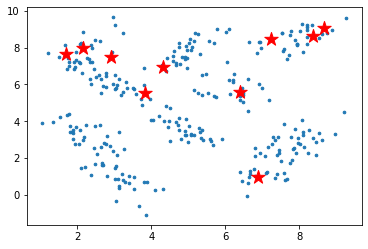

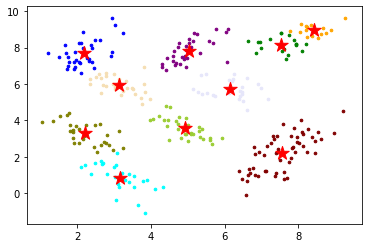

[1921.033485856206, 1294.2984174853177, 789.237972217795, 613.986628606663, 538.3680591713139, 419.3408157431245, 305.4540985153899, 240.38031402770537, 220.09246405786033]


In [19]:
k_array = []
objective_array = []
# Number of clusters
K=10
for k in range(2, K+1):
    j=rd.randint(0,data.shape[0]-1)                   # randomly select one sample from the data [0,300)
    C=np.array([data[j]])
    
    C = random_initializing_centroid(k, C)
    #print("Where nan are")
    print(C)
    
    sum = 0
    k_array.append(k)

    # Plotting along with the Centroids
    plt.scatter(feature1, feature2, s=7)
    plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='r', label='centroid')

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(data))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    
    C_values = []
    # Loop will run till the error becomes zero
    while error > 0.1 or np.argwhere(np.isnan(clusters))[:,0].size != 0 :
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = dist(data[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
            
        error = dist(C, C_old, None)

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)

    clusters = np.zeros(len(data))
    C, clusters, points = iteration(data, C, k, clusters, C_old)
    #print(C)
    #print("Where nan are")
    #print(np.argwhere(np.isnan(C)))
    
    sum_of_clusters = 0
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        val = cal_sse(points,C[i])
        sum_of_clusters += val
        
        
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
    objective_array.append(sum_of_clusters)
    
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='r', label='centroid')
    plt.show()
    
    print (objective_array)
 

In [20]:
#print(k_array)
#print(objective_array)
#print(C)

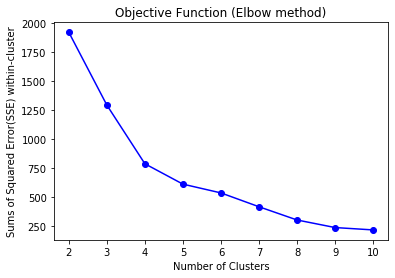

In [21]:
#Plot the Objective Function
plt.plot(k_array, objective_array, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Sums of Squared Error(SSE) within-cluster')
plt.title('Objective Function (Elbow method)')
plt.show()